In [339]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import seaborn as sns
import glob



In [340]:
df=pd.read_csv('Results_v1.csv')

In [341]:
df['Date GPS']=pd.to_datetime(df['Date GPS'],dayfirst=True)

In [342]:
df_new = df.set_index('Date GPS').between_time('13:25:00', '16:20:00')

In [317]:
df_new

,"Datetime, dd/mm/yyyy hh:mm:ss","GPS Time, hhmmssddmmyy",Status,Antenna,Longitude,Latitude,"Altitude, m","Speed, km/h",Course,"HDC TEMP, `C",...,"LSM AX, mg","LSM AY, mg","LSM AZ, mg",LSM GX,LSM GY,LSM GZ,PM2.5,PM10,"BATT, V","VSYS, V"
Date GPS,,,,,,,,,,,,,,,,,,,,,
2022-05-08 13:25:00+05:00,'05/08/2022 14:24:55,'082500080522,FIX,OK,65.004814,40.13285,323.2,2.0,54.5,38.3,...,134.1,-35.7,990.9,210.0,560.0,37870.0,9.4,52.9,4.18,0.04
2022-05-08 13:25:01+05:00,'05/08/2022 14:24:56,'082501080522,FIX,OK,65.004822,40.13285,323.2,0.0,54.5,38.3,...,136.3,-32.5,1012.7,36610.0,-5670.0,37100.0,9.3,52.9,4.18,0.05
2022-05-08 13:25:02+05:00,'05/08/2022 14:24:56,'082502080522,FIX,OK,65.004822,40.13285,323.2,0.0,54.5,38.3,...,136.3,-32.5,1012.7,36610.0,-5670.0,37100.0,9.3,52.9,4.18,0.05
2022-05-08 13:25:03+05:00,'05/08/2022 14:24:57,'082503080522,FIX,OK,65.004822,40.13285,323.2,0.0,54.5,38.3,...,122.2,-45.5,1015.5,-3430.0,28070.0,-37380.0,9.3,53.9,4.18,0.05
2022-05-08 13:25:04+05:00,'05/08/2022 14:24:58,'082504080522,FIX,OK,65.004822,40.13285,323.2,0.0,54.5,38.3,...,131.0,-38.5,1023.2,-24710.0,-9380.0,-9310.0,9.2,58.1,4.18,0.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-08 16:19:56+05:00,'05/08/2022 17:19:54,'111956080522,FIX,OK,65.729088,40.68353,445.2,0.0,154.4,38.3,...,-144.5,-997.0,-69.2,0.0,0.0,0.0,6.5,15.5,4.09,0.04
2022-05-08 16:19:57+05:00,'05/08/2022 17:19:55,'111957080522,FIX,OK,65.729088,40.68353,445.2,0.0,154.4,38.3,...,-144.5,-997.0,-69.7,0.0,0.0,0.0,6.5,15.5,4.09,0.04
2022-05-08 16:19:58+05:00,'05/08/2022 17:19:56,'111958080522,FIX,OK,65.729088,40.68353,445.3,0.0,154.4,38.3,...,-144.5,-997.2,-70.1,0.0,0.0,0.0,6.6,15.5,4.09,0.04


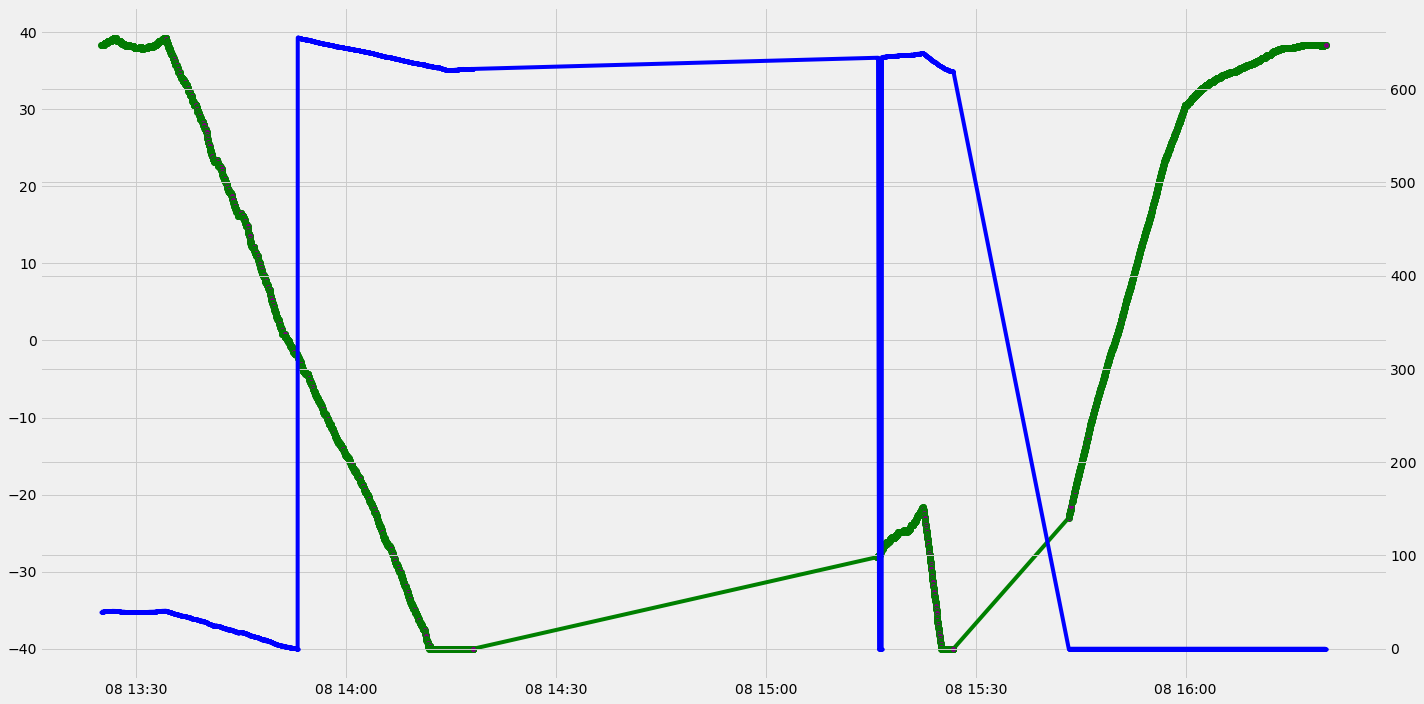

In [318]:
# create figure and axis objects with subplots()

plt.rcParams["figure.figsize"] = [20, 10]
plt.rcParams["figure.autolayout"] = True
fig,ax = plt.subplots()
# make a plot

ax.plot(df_new.index.to_pydatetime(), df_new['HDC TEMP, `C'], color="green",markerfacecolor = 'purple',marker="o")
# set x-axis label
#ax.set_xlabel("Date",fontsize=14)
# set y-axis label
#ax.set_ylabel("HUMIDITY",color="red",fontsize=14)
# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(df_new.index.to_pydatetime(), df_new['LPS TEMP, `C'],color="blue",marker=".")
#ax2.set_ylabel("TEMPERATURE",color="blue",fontsize=14)
#plt.axhline(y = -20, color = 'r', linestyle = '-',label='Lower Boundary of Temperature')
#plt.legend( loc = 'upper center')
#plt.title(label="Humidity % Over Flight Period",fontsize=40,color="green")
plt.show()
# save the plot as a file
#fig.savefig('Graph Humidity.jpg',format='jpeg',dpi=100,bbox_inches='tight')


In [319]:
df['HDC TEMP, `C'].unique()

array([ 27.2,  27.7,  27.8,  27.9,  25.1,  25.2,  25.3,  25.4,  25.5,
        25.6,  25.7,  25.8,  25.9,  26. ,  26.1,  26.2,  26.3,  26.4,
        26.5,  37.2,  37.1,  37. ,  36.9,  36.8,  37.3,  37.4,  37.5,
        37.6,  37.7,  37.8,  37.9,  38. ,  38.1,  38.2,  38.3,  38.4,
        38.5,  38.6,  38.7,  38.8,  38.9,  39. ,  39.1,  39.2,  39.3,
        39.4,  36.7,  36.6,  36.5,  36.3,  36.2,  36.1,  35.9,  36. ,
        35.8,  35.7,  35.5,  35.4,  35.2,  35. ,  34.9,  34.8,  34.7,
        34.5,  34.6,  34.2,  34.1,  34. ,  33.9,  33.7,  33.8,  33.6,
        33.5,  33.3,  33.2,  33.1,  33. ,  32.9,  32.7,  32.8,  32.5,
        32.4,  32.2,  32.3,  32.1,  31.9,  31.8,  31.7,  31.3,  31.4,
        31.1,  31.2,  31. ,  30.9,  30.7,  30.8,  30.6,  30.5,  30.3,
        30.1,  30.2,  30. ,  29.6,  29.7,  29.8,  29.4,  29.5,  29.3,
        29.2,  29.1,  28.9,  28.8,  28.7,  28.6,  28.4,  28.5,  28.3,
        28.2,  28. ,  27.6,  27.4,  27.5,  27.1,  26.7,  24.9,  24.8,
        24.7,  24.6,

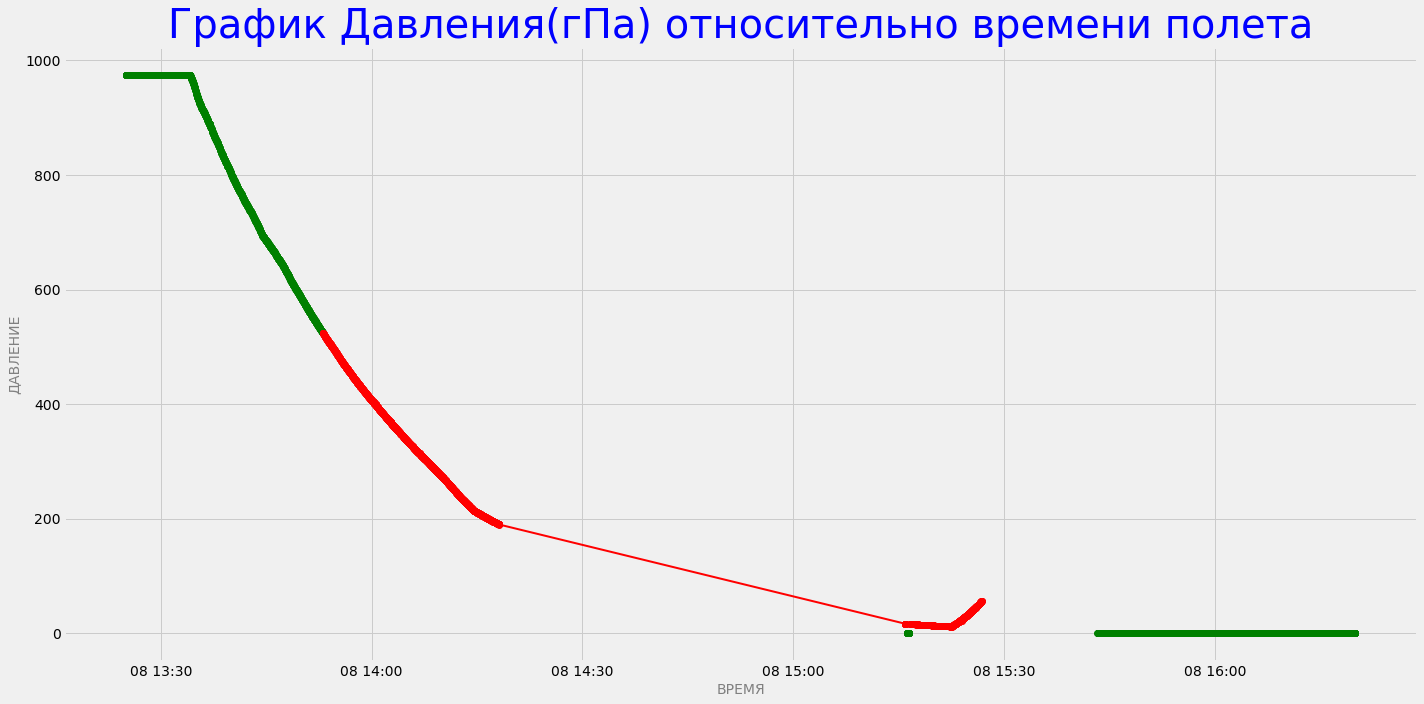

In [344]:

df=df_new.copy()
fig, ax = plt.subplots()
df['label'] = np.where((df['LPS TEMP, `C'] < -40) | (df['LPS TEMP, `C'] < 85), 1, -1)

def plot_func(group):
    global ax
    color = 'r' if (group['label'] < 0).all() else 'g'
    lw = 2.0
    ax.set_ylabel("ДАВЛЕНИЕ",color="gray",fontsize=14)
    ax.set_xlabel("ВРЕМЯ",color="gray",fontsize=14)
    ax.plot(group.index, group['LPS PRESS, hPa'], c=color, linewidth=lw,marker="o")

df.groupby((df['label'].shift() * df['label'] < 0).cumsum()).apply(plot_func)

plt.title(label="График Давления(гПа) относительно времени полета",fontsize=40,
          color="blue")
plt.show()

fig.savefig('Graph PressureRU.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')

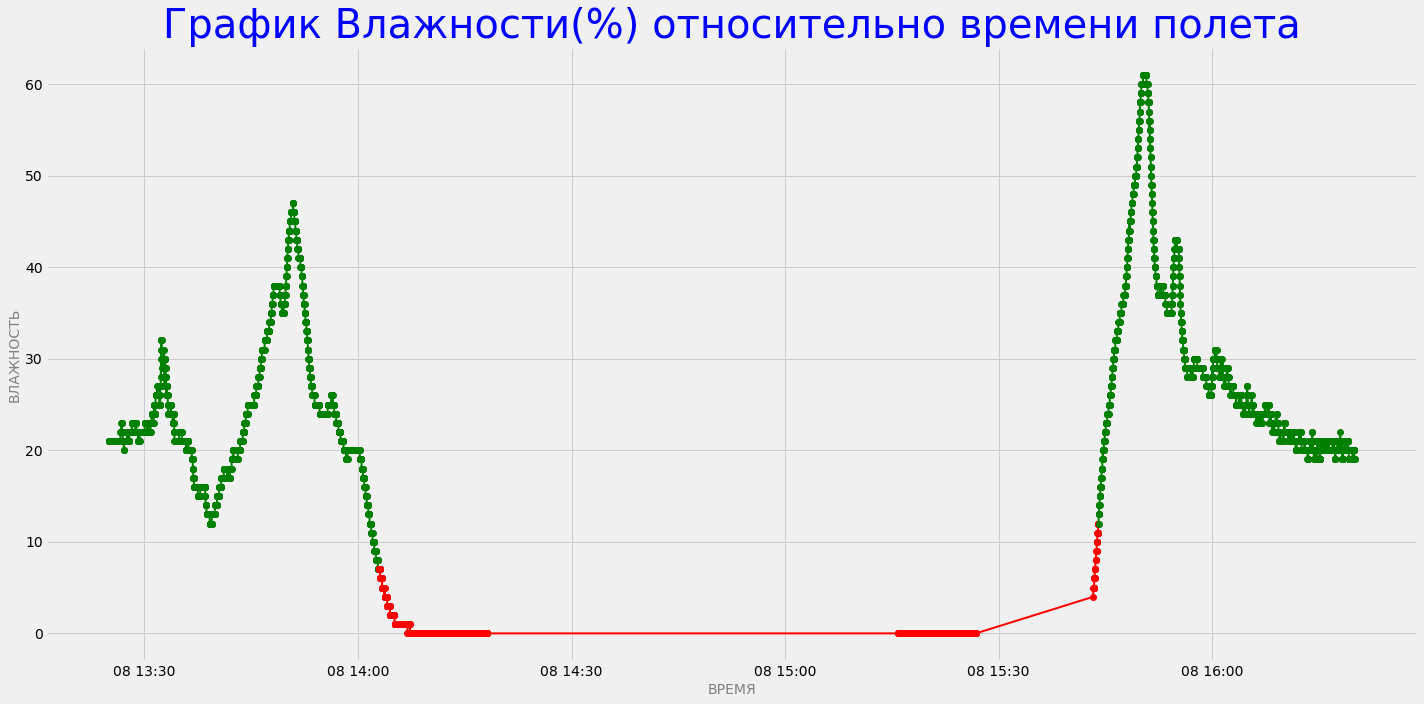

In [321]:

df=df_new.copy()
fig, ax = plt.subplots()
df['label'] = np.where(df['HDC TEMP, `C'] > -20, 1, -1)

def plot_func(group):
    global ax
    color = 'r' if (group['label'] < 0).all() else 'g'
    lw = 2.0
    ax.set_ylabel("ВЛАЖНОСТЬ",color="gray",fontsize=14)
    ax.set_xlabel("ВРЕМЯ",color="gray",fontsize=14)
    ax.plot(group.index, group['HDC HUM, %'], c=color, linewidth=lw,marker="o")

df.groupby((df['label'].shift() * df['label'] < 0).cumsum()).apply(plot_func)

plt.title(label="График Влажности(%) относительно времени полета",fontsize=40,
          color="blue")
plt.show()

fig.savefig('Graph HumidityRU.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')

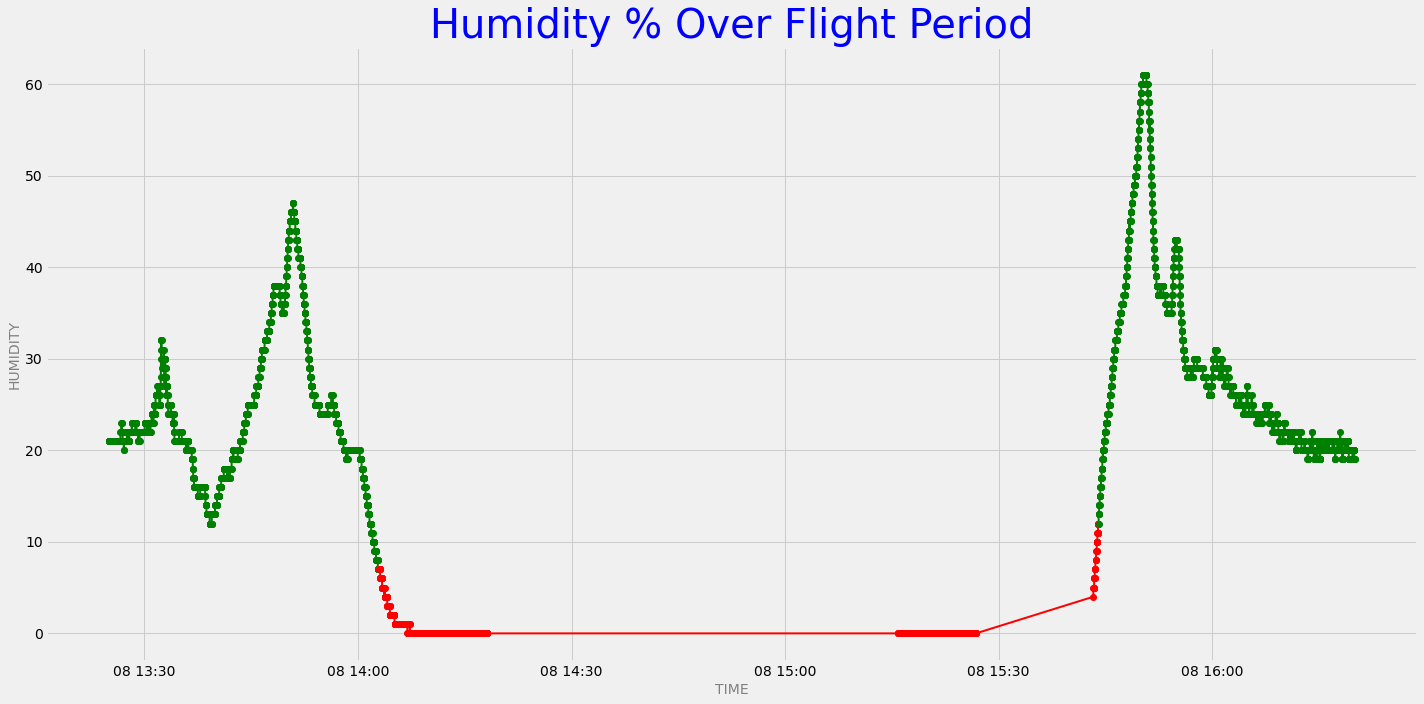

In [322]:
df=df_new.copy()
fig, ax = plt.subplots()
df['label'] = np.where(df['HDC TEMP, `C'] > -20, 1, -1)

def plot_func(group):
    global ax
    color = 'r' if (group['label'] < 0).all() else 'g'
    lw = 2.0
    ax.set_ylabel("HUMIDITY",color="gray",fontsize=14)
    ax.set_xlabel("TIME",color="gray",fontsize=14)
    ax.plot(group.index, group['HDC HUM, %'], c=color, linewidth=lw,marker="o")

df.groupby((df['label'].shift() * df['label'] < 0).cumsum()).apply(plot_func)

plt.title(label="Humidity % Over Flight Period",fontsize=40,
          color="blue")
plt.show()

fig.savefig('Graph Humidity.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')

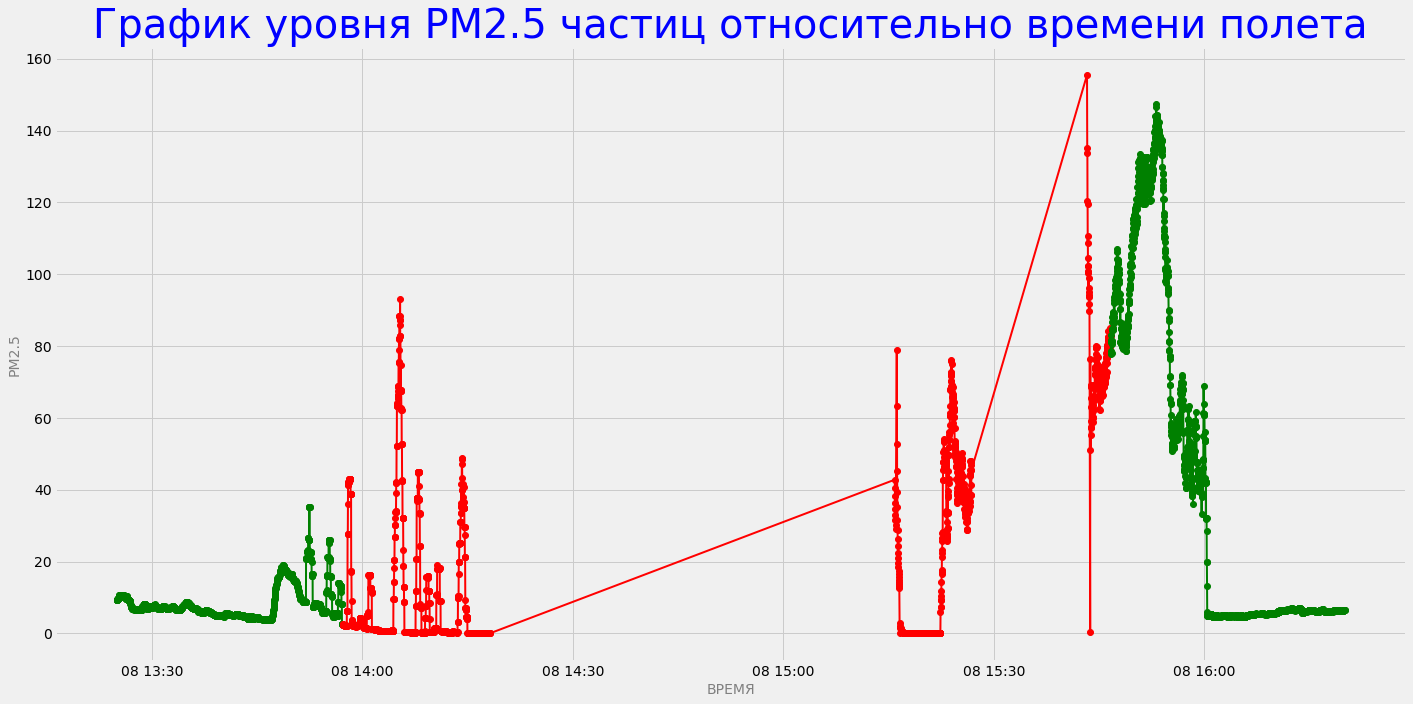

In [323]:

df=df_new.copy()
fig, ax = plt.subplots()
df['label'] = np.where(df['HDC TEMP, `C'] > -10, 1, -1)

def plot_func(group):
    global ax
    color = 'r' if (group['label'] < 0).all() else 'g'
    lw = 2.0
    ax.set_ylabel("PM2.5",color="gray",fontsize=14)
    ax.set_xlabel("ВРЕМЯ",color="gray",fontsize=14)
    ax.plot(group.index, group['PM2.5'], c=color, linewidth=lw,marker="o")

df.groupby((df['label'].shift() * df['label'] < 0).cumsum()).apply(plot_func)

plt.title(label="График уровня PM2.5 частиц относительно времени полета",fontsize=40,
          color="blue")
plt.show()

fig.savefig('Graph PM2.5RU.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')

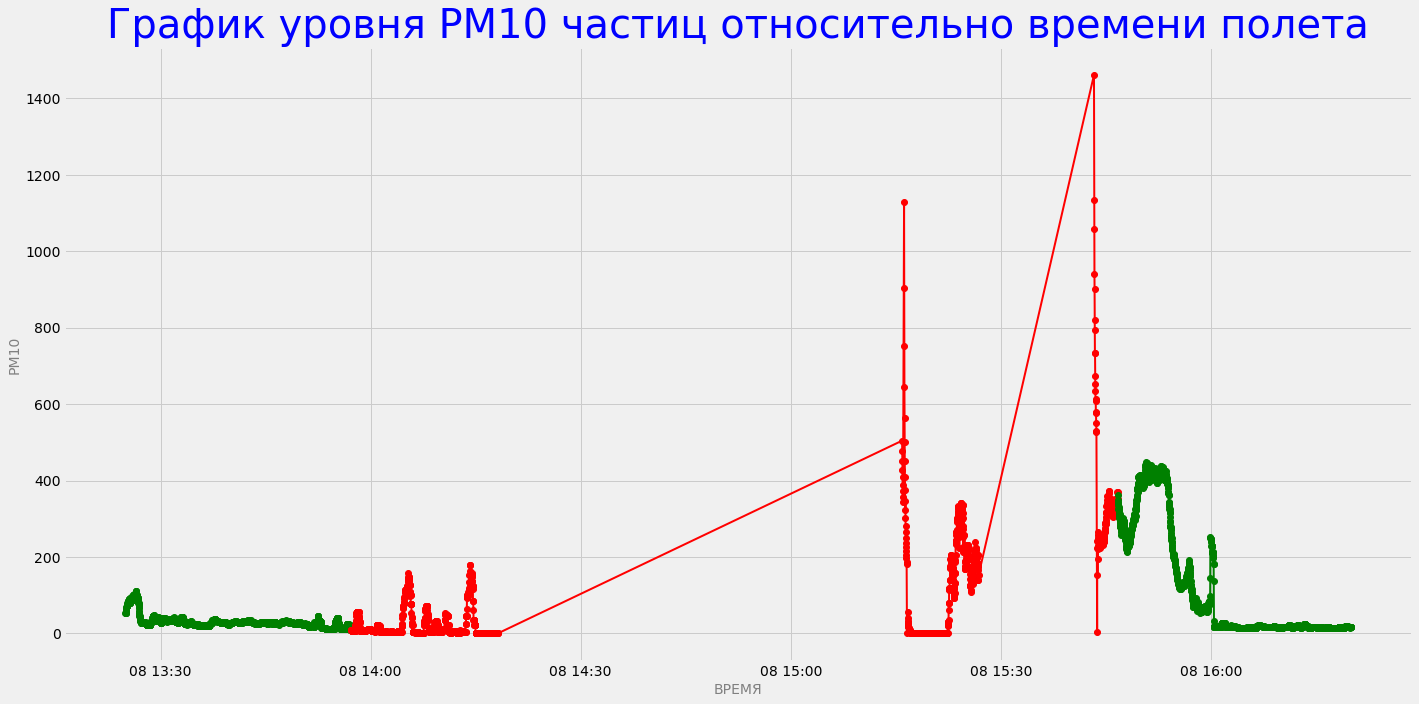

In [324]:
df=df_new.copy()
fig, ax = plt.subplots()
df['label'] = np.where(df['HDC TEMP, `C'] > -10, 1, -1)

def plot_func(group):
    global ax
    color = 'r' if (group['label'] < 0).all() else 'g'
    lw = 2.0
    ax.set_ylabel("PM10",color="gray",fontsize=14)
    ax.set_xlabel("ВРЕМЯ",color="gray",fontsize=14)
    ax.plot(group.index, group['PM10'], c=color, linewidth=lw,marker="o")

df.groupby((df['label'].shift() * df['label'] < 0).cumsum()).apply(plot_func)

plt.title(label="График уровня PM10 частиц относительно времени полета",fontsize=40,
          color="blue")
plt.show()

fig.savefig('Graph PM10RU.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')

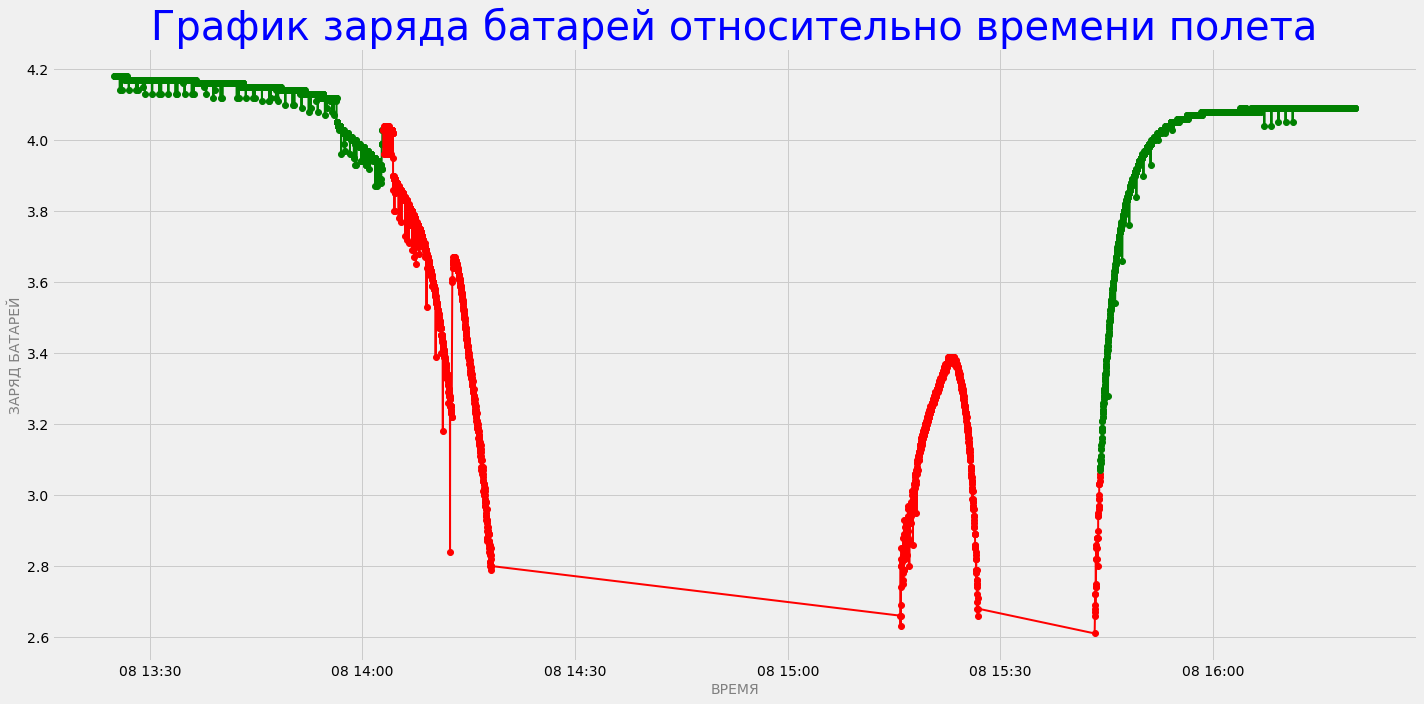

In [325]:

df=df_new.copy()
fig, ax = plt.subplots()
df['label'] = np.where((df['HDC TEMP, `C'] > -20) & (df['HDC TEMP, `C'] < 85), 1, -1)

def plot_func(group):
    global ax
    color = 'r' if (group['label'] < 0).all() else 'g'
    lw = 2.0
    ax.set_ylabel("НАПРЯЖЕНИЕ БАТАРЕЙ",color="gray",fontsize=14)
    ax.set_xlabel("ВРЕМЯ",color="gray",fontsize=14)
    ax.plot(group.index, group['BATT, V'], c=color, linewidth=lw,marker="o")

df.groupby((df['label'].shift() * df['label'] < 0).cumsum()).apply(plot_func)

plt.title(label="График напряжение батарей относительно времени полета",fontsize=40,
          color="blue")
plt.show()

fig.savefig('1Graph batterRU.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')

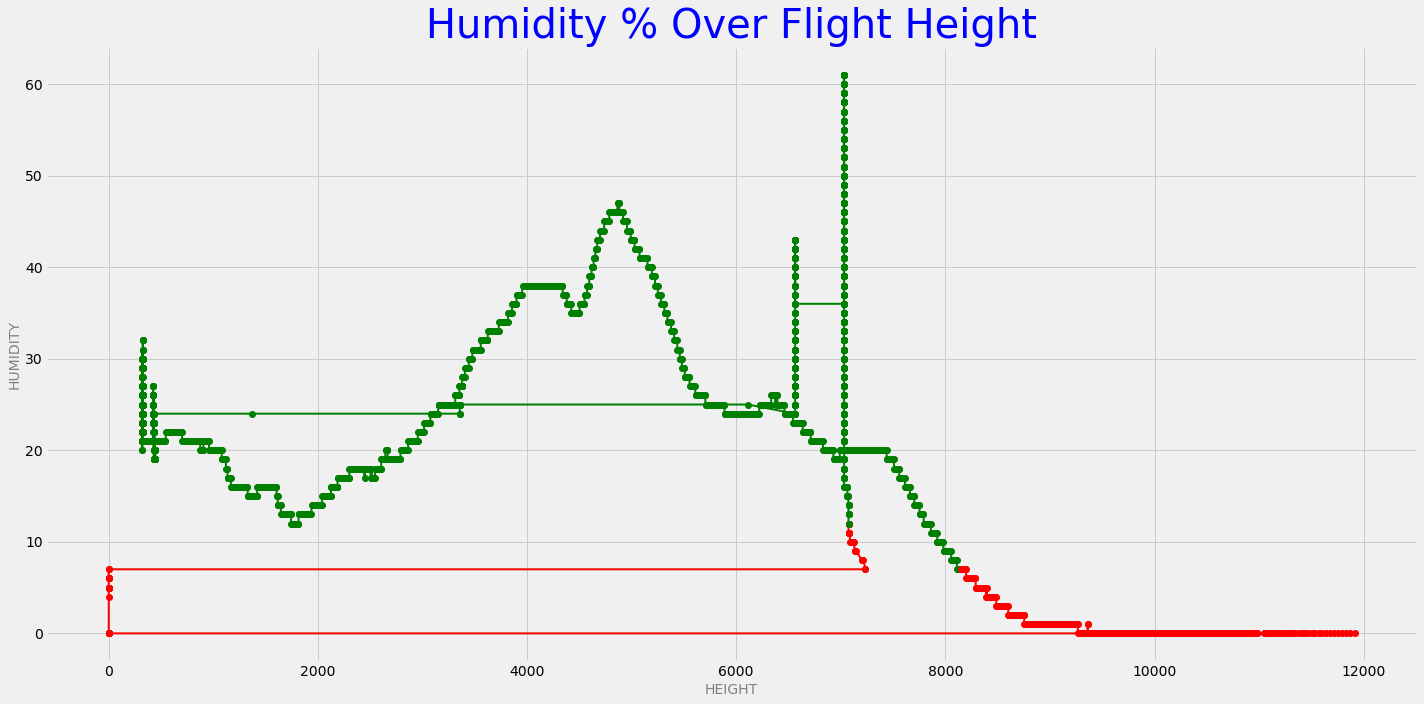

In [326]:
df=df_new.copy()
fig, ax = plt.subplots()
df['label'] = np.where(df['HDC TEMP, `C'] > -20, 1, -1)

def plot_func(group):
    global ax
    color = 'r' if (group['label'] < 0).all() else 'g'
    lw = 2.0
    ax.set_ylabel("HUMIDITY",color="gray",fontsize=14)
    ax.set_xlabel("HEIGHT",color="gray",fontsize=14)
    ax.plot(group['Altitude, m'], group['HDC HUM, %'], c=color, linewidth=lw,marker="o")

df.groupby((df['label'].shift() * df['label'] < 0).cumsum()).apply(plot_func)

plt.title(label="Humidity % Over Flight Height",fontsize=40,
          color="blue")
plt.show()

fig.savefig('Graph Humidity Height.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')

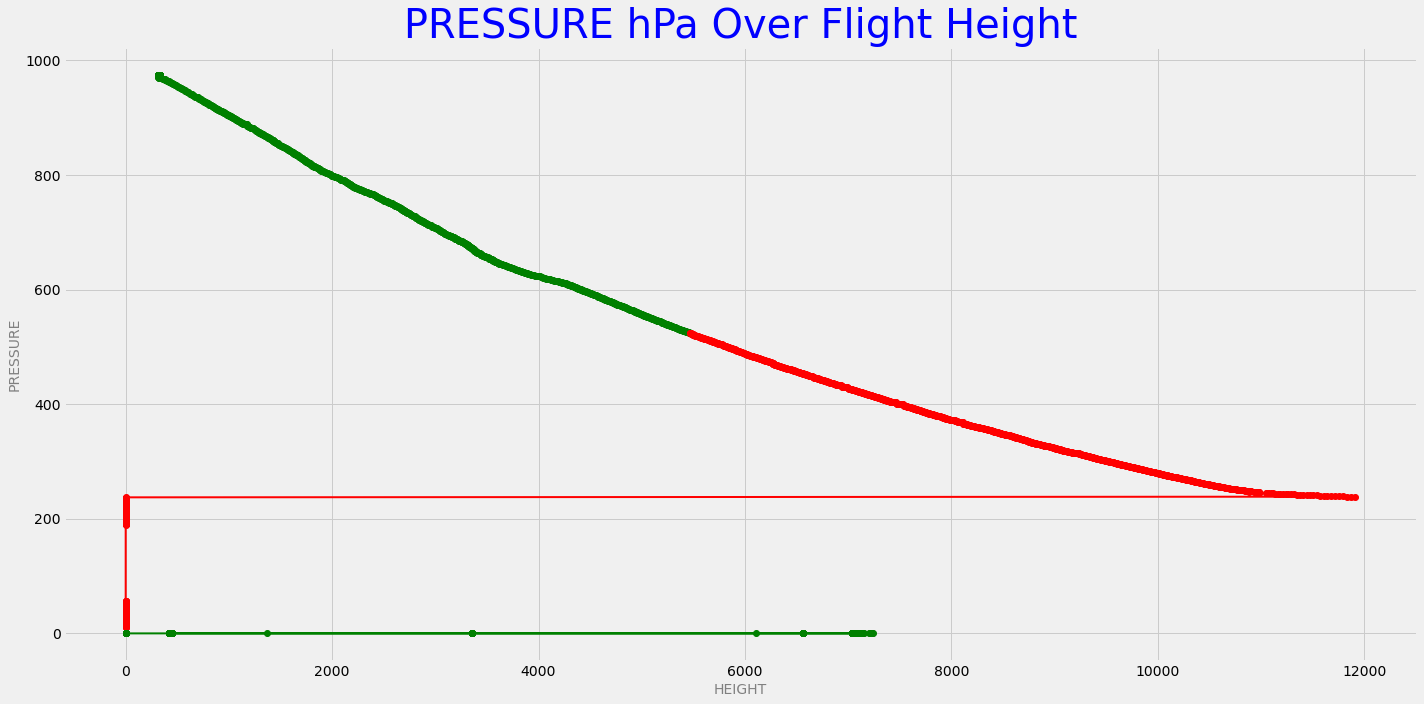

In [327]:
df=df_new.copy()
fig, ax = plt.subplots()
df['label'] = np.where((df['LPS TEMP, `C'] > -40) & (df['LPS TEMP, `C'] < 85) , 1, -1)

def plot_func(group):
    global ax
    color = 'r' if (group['label'] < 0).all() else 'g'
    lw = 2.0
    ax.set_ylabel("PRESSURE",color="gray",fontsize=14)
    ax.set_xlabel("HEIGHT",color="gray",fontsize=14)
    ax.plot(group['Altitude, m'], group['LPS PRESS, hPa'], c=color, linewidth=lw,marker="o")

df.groupby((df['label'].shift() * df['label'] < 0).cumsum()).apply(plot_func)

plt.title(label="PRESSURE hPa Over Flight Height",fontsize=40,
          color="blue")
plt.show()

fig.savefig('Graph Pressure Height.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')

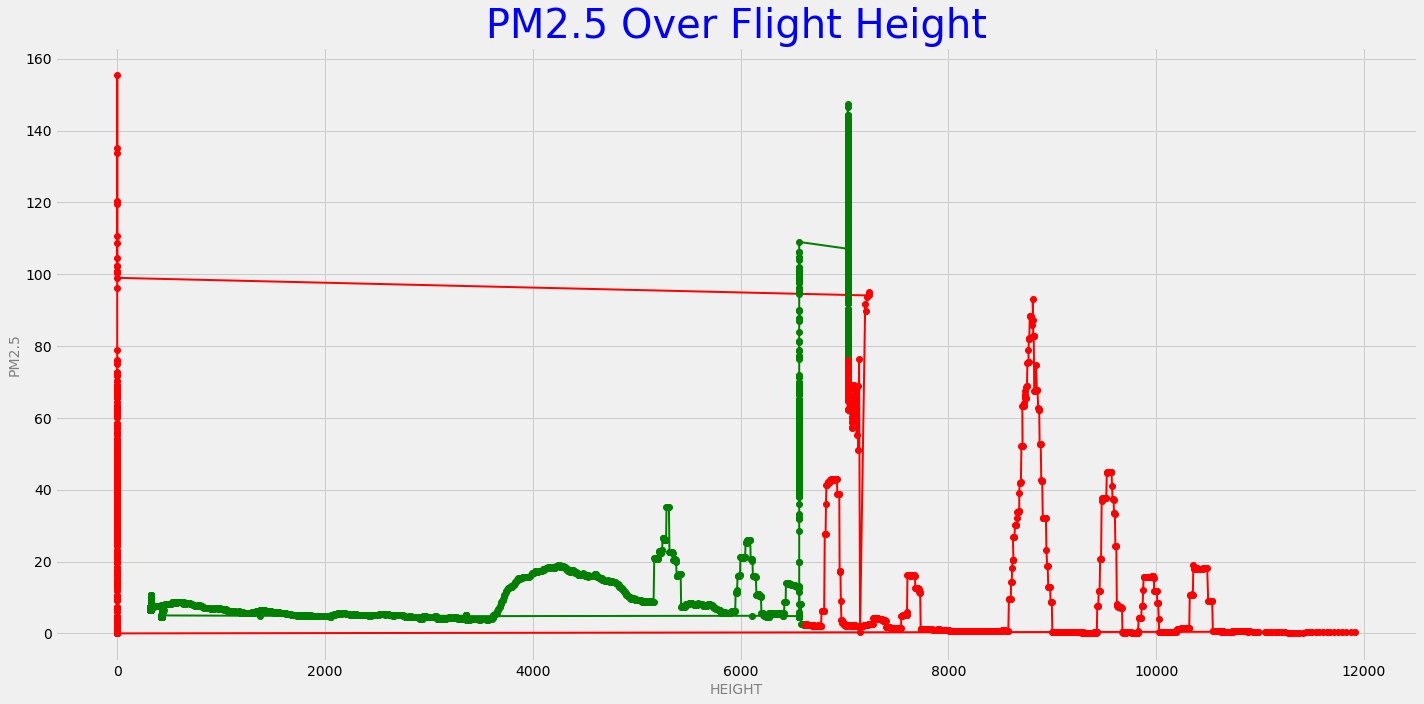

In [328]:
df=df_new.copy()
fig, ax = plt.subplots()
df['label'] = np.where(df['HDC TEMP, `C'] > -10, 1, -1)

def plot_func(group):
    global ax
    color = 'r' if (group['label'] < 0).all() else 'g'
    lw = 2.0
    ax.set_ylabel("PM2.5",color="gray",fontsize=14)
    ax.set_xlabel("HEIGHT",color="gray",fontsize=14)
    ax.plot(group['Altitude, m'], group['PM2.5'], c=color, linewidth=lw,marker="o")

df.groupby((df['label'].shift() * df['label'] < 0).cumsum()).apply(plot_func)

plt.title(label="PM2.5 Over Flight Height",fontsize=40,
          color="blue")
plt.show()

fig.savefig('Graph PM2.5 Height.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')

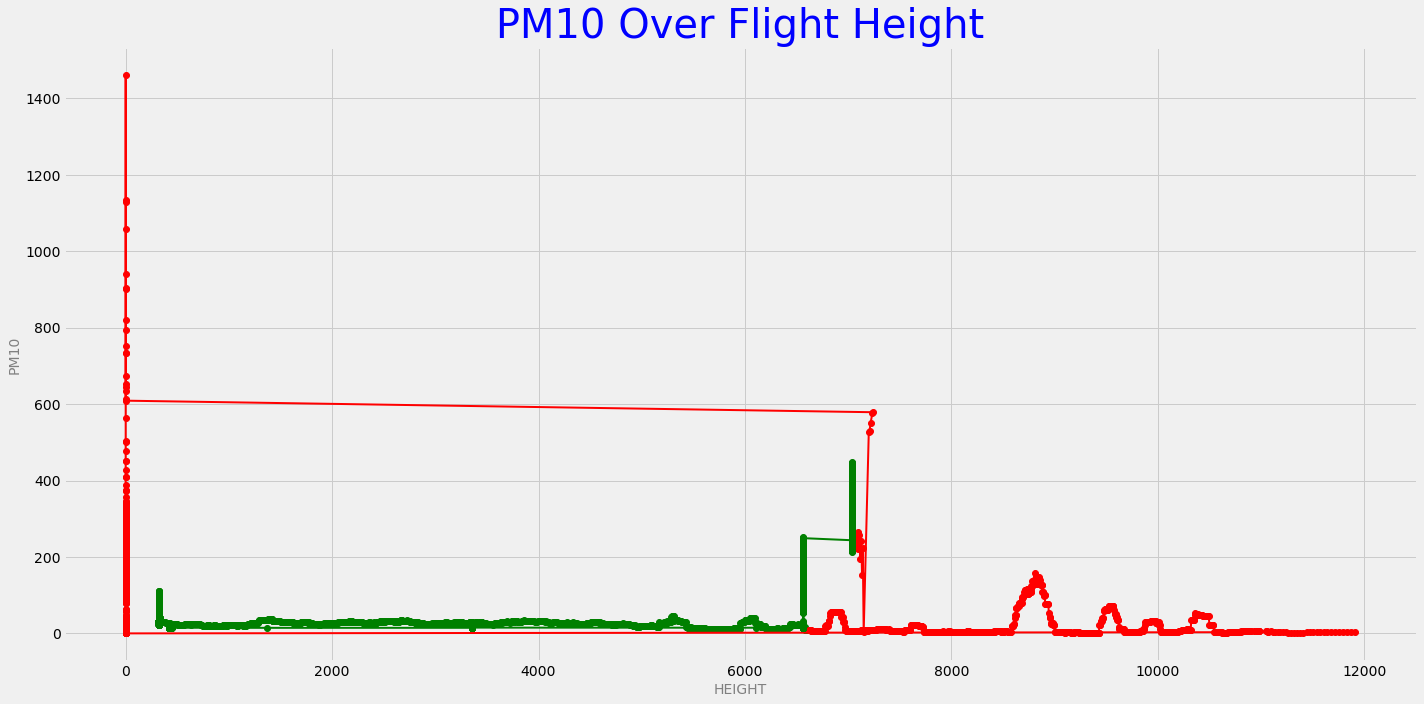

In [329]:
df=df_new.copy()
fig, ax = plt.subplots()
df['label'] = np.where(df['HDC TEMP, `C'] > -10, 1, -1)

def plot_func(group):
    global ax
    color = 'r' if (group['label'] < 0).all() else 'g'
    lw = 2.0
    ax.set_ylabel("PM10",color="gray",fontsize=14)
    ax.set_xlabel("HEIGHT",color="gray",fontsize=14)
    ax.plot(group['Altitude, m'], group['PM10'], c=color, linewidth=lw,marker="o")

df.groupby((df['label'].shift() * df['label'] < 0).cumsum()).apply(plot_func)

plt.title(label="PM10 Over Flight Height",fontsize=40,
          color="blue")
plt.show()

fig.savefig('Graph PM10 Height.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')

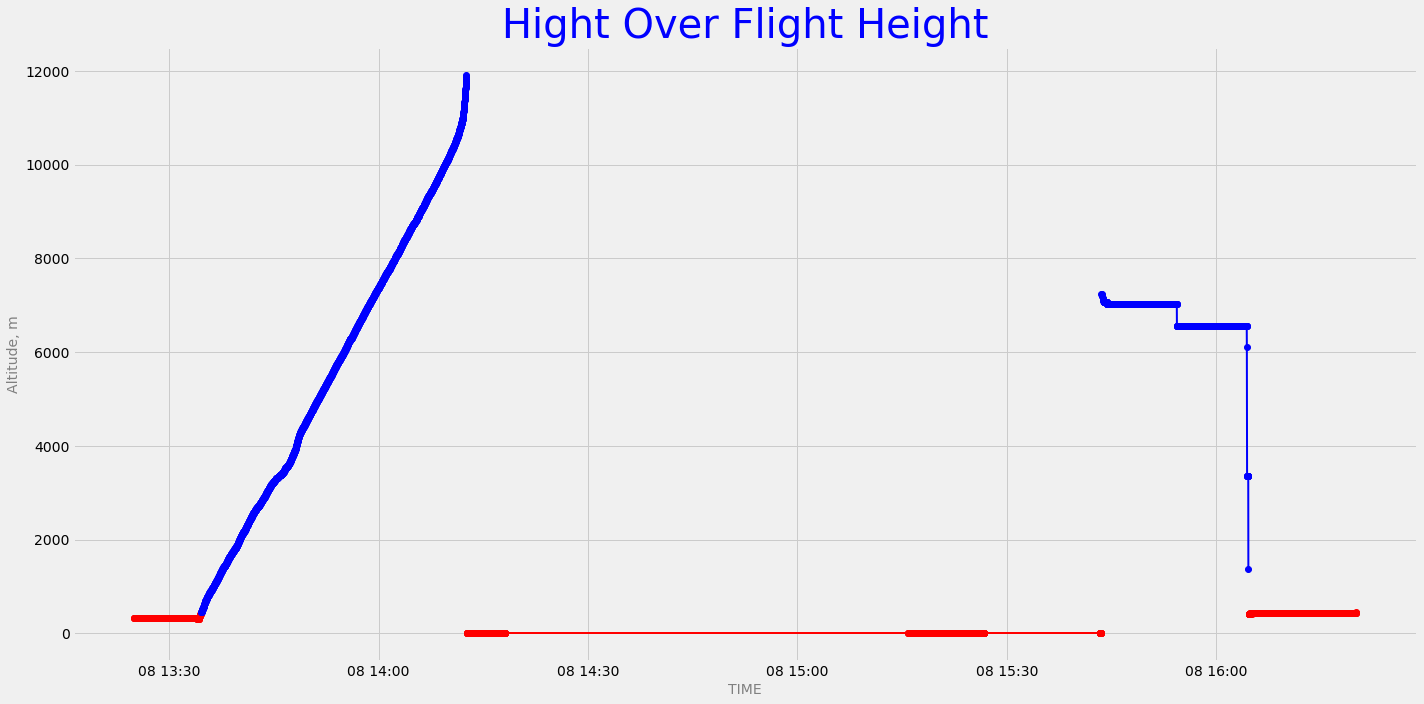

In [330]:
df=df_new.copy()
fig, ax = plt.subplots()
df['label'] = np.where((df['Altitude, m'] > 450), 1, -1)

def plot_func(group):
    global ax
    color = 'r' if (group['label'] < 0).all() else 'b'
    lw = 2.0
    ax.set_ylabel("Altitude, m",color="gray",fontsize=14)
    ax.set_xlabel("TIME",color="gray",fontsize=14)
    ax.plot(group.index,group['Altitude, m'], c=color, linewidth=lw,marker="o")

df.groupby((df['label'].shift() * df['label'] < 0).cumsum()).apply(plot_func)

plt.title(label="Hight Over Flight Height",fontsize=40,
          color="blue")
plt.show()

fig.savefig('Graph Height.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')

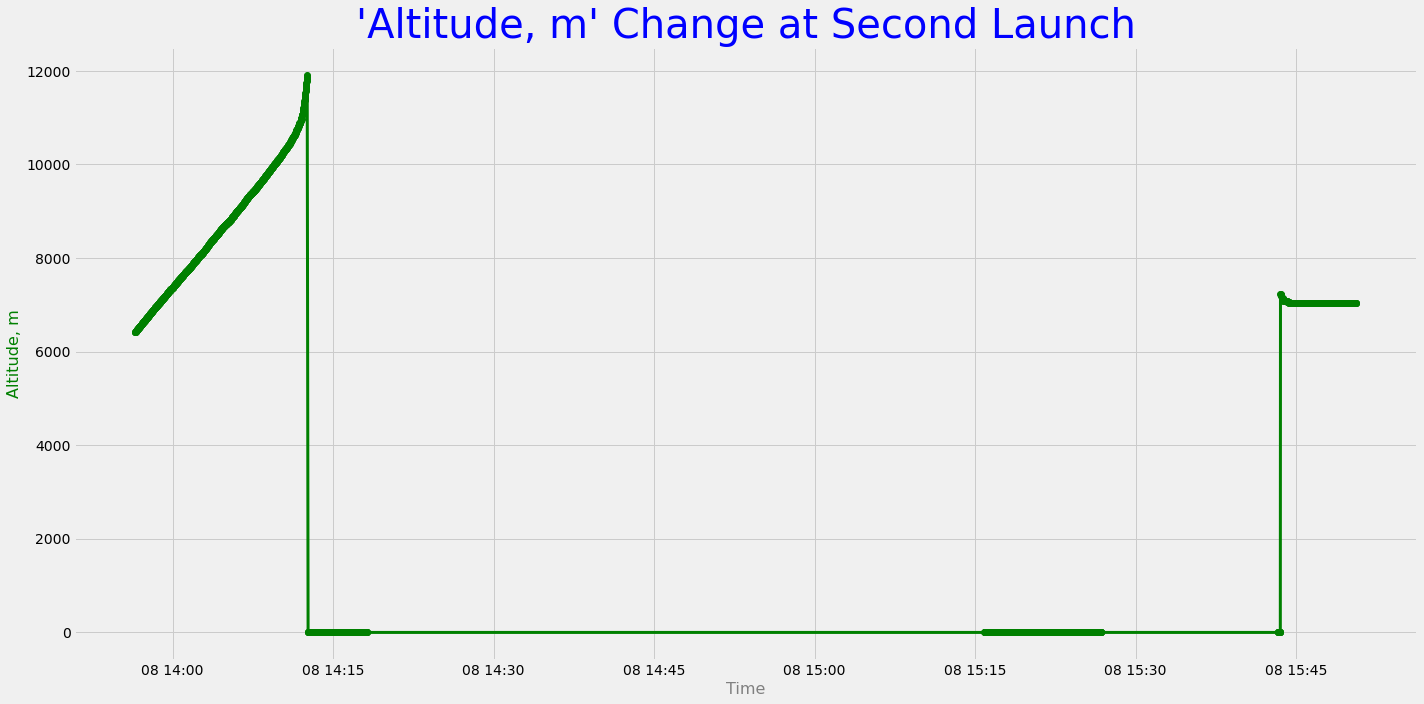

In [331]:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots()
ax.set_ylabel("Altitude, m",color="g",fontsize=16)
ax.set_xlabel("Time",color="gray",fontsize=16)
plt.title(label="'Altitude, m' Change at Second Launch",fontsize=40,
          color="blue")

ax.plot(df.iloc[1890:].head(2350).index,df['Altitude, m'].iloc[1890:].head(2350),c='green', linewidth=3,marker="o")
fig.savefig('Graph Altitude, m2.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')

In [332]:
df.iloc[6392:].head(50)
#4192

,"Datetime, dd/mm/yyyy hh:mm:ss","GPS Time, hhmmssddmmyy",Status,Antenna,Longitude,Latitude,"Altitude, m","Speed, km/h",Course,"HDC TEMP, `C",...,"LSM AY, mg","LSM AZ, mg",LSM GX,LSM GY,LSM GZ,PM2.5,PM10,"BATT, V","VSYS, V",label
Date GPS,,,,,,,,,,,,,,,,,,,,,


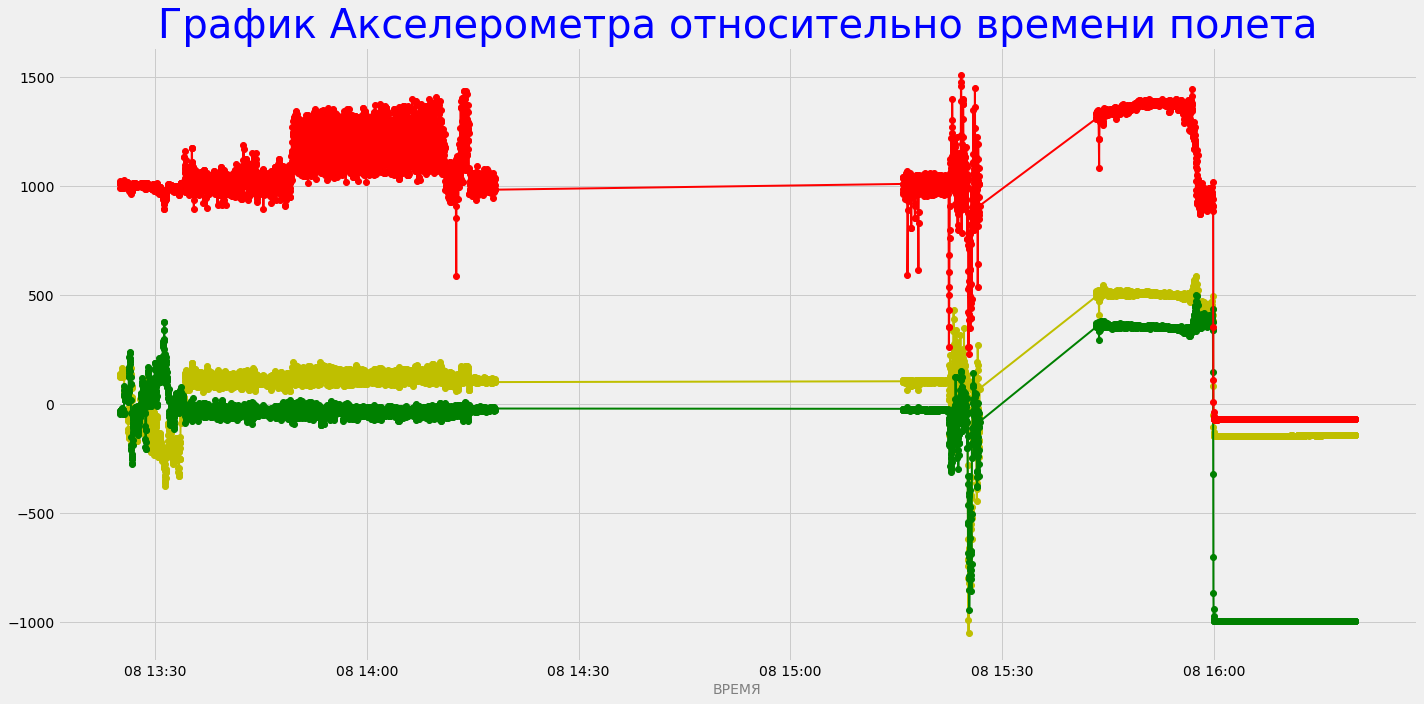

In [333]:
df=df_new.copy()
fig, ax = plt.subplots()
lw = 2.0
ax.set_xlabel("ВРЕМЯ",color="gray",fontsize=14)
ax.plot(df.index, df['LSM AX, mg'], c='y', linewidth=lw,marker="o")
ax.plot(df.index, df['LSM AY, mg'], c='g', linewidth=lw,marker="o")
ax.plot(df.index, df['LSM AZ, mg'], c='r', linewidth=lw,marker="o")
plt.title(label="График Акселерометра относительно времени полета",fontsize=40,
          color="blue")
plt.show()

fig.savefig('Graph LSMRUALL.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')

In [334]:
df['LSM AX, mg'].to_csv('LSM')

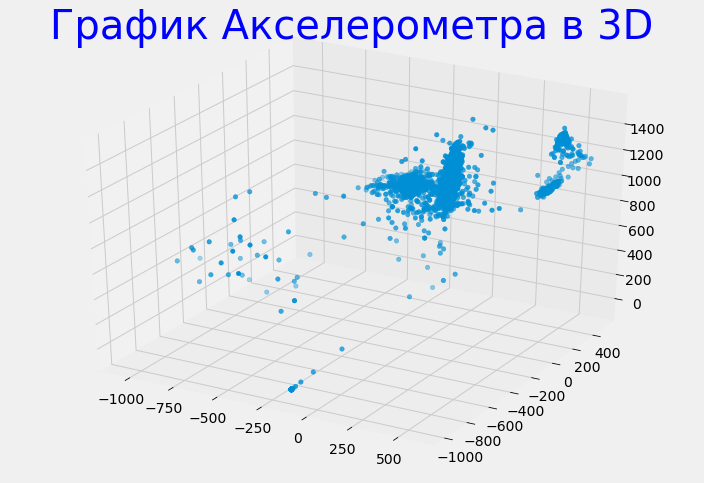

In [335]:
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
my_cmap = plt.get_cmap('hsv')
# Creating plot
ax.scatter3D(df['LSM AX, mg'], df['LSM AY, mg'], df['LSM AZ, mg'], cmap = my_cmap)
plt.title(label="График Акселерометра в 3D",fontsize=40,
          color="blue")
plt.show()

fig.savefig('Graph ACC#D.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')

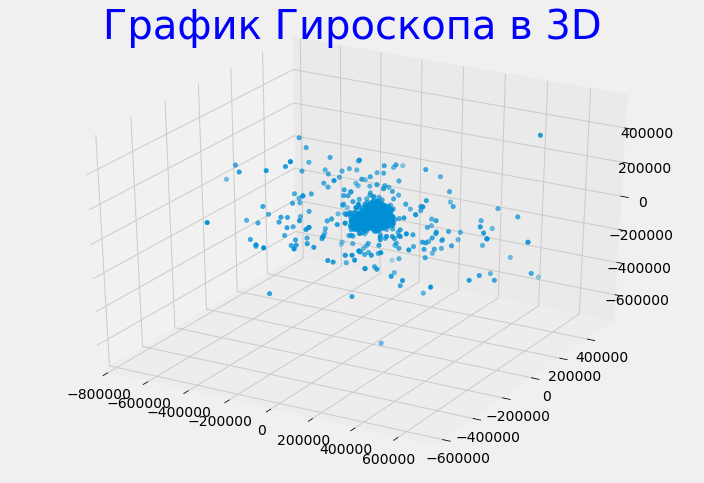

In [336]:
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
my_cmap = plt.get_cmap('hsv')
# Creating plot
ax.scatter3D(df['LSM GX'], df['LSM GY'], df['LSM GZ'], cmap = my_cmap)
plt.title(label="График Гироскопа в 3D",fontsize=40,
          color="blue")
plt.show()

fig.savefig('Graph giro3D.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')

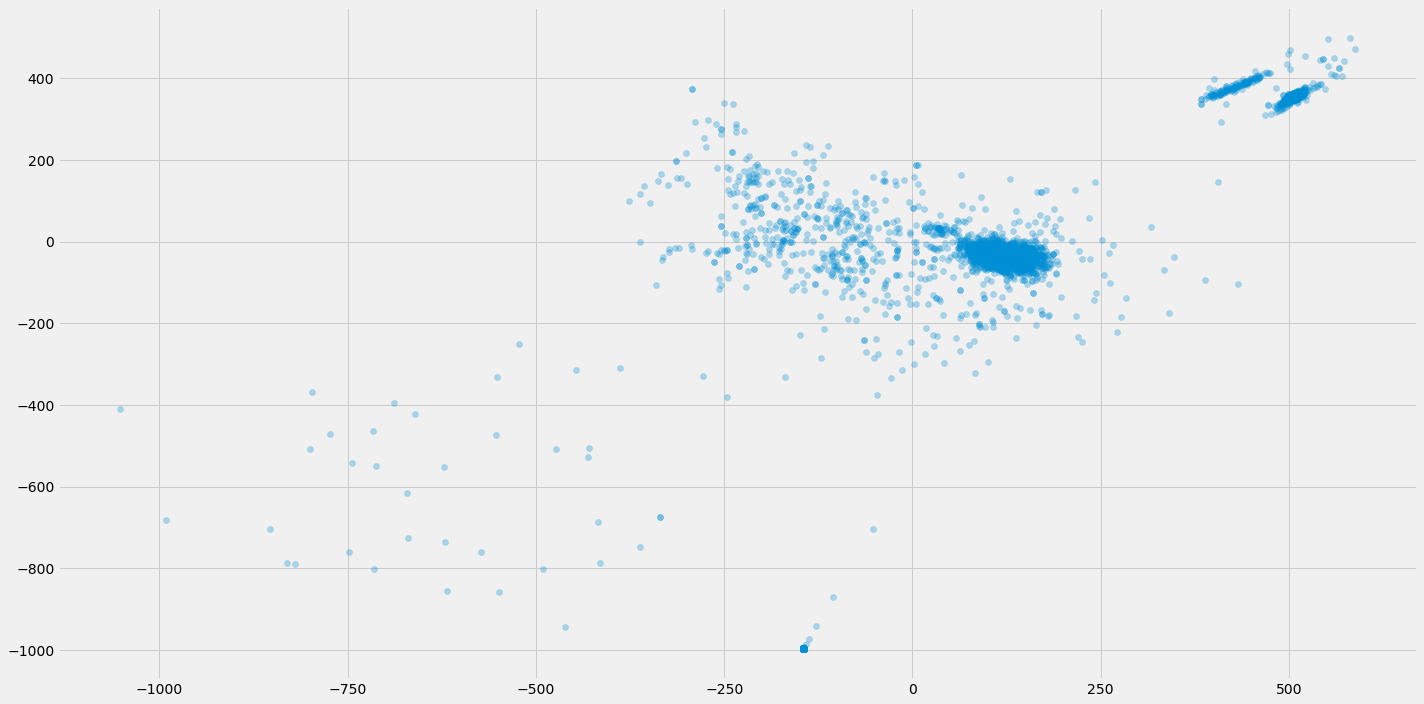

In [337]:
plt.scatter(df['LSM AX, mg'], df['LSM AY, mg'], alpha=0.3,cmap='viridis')

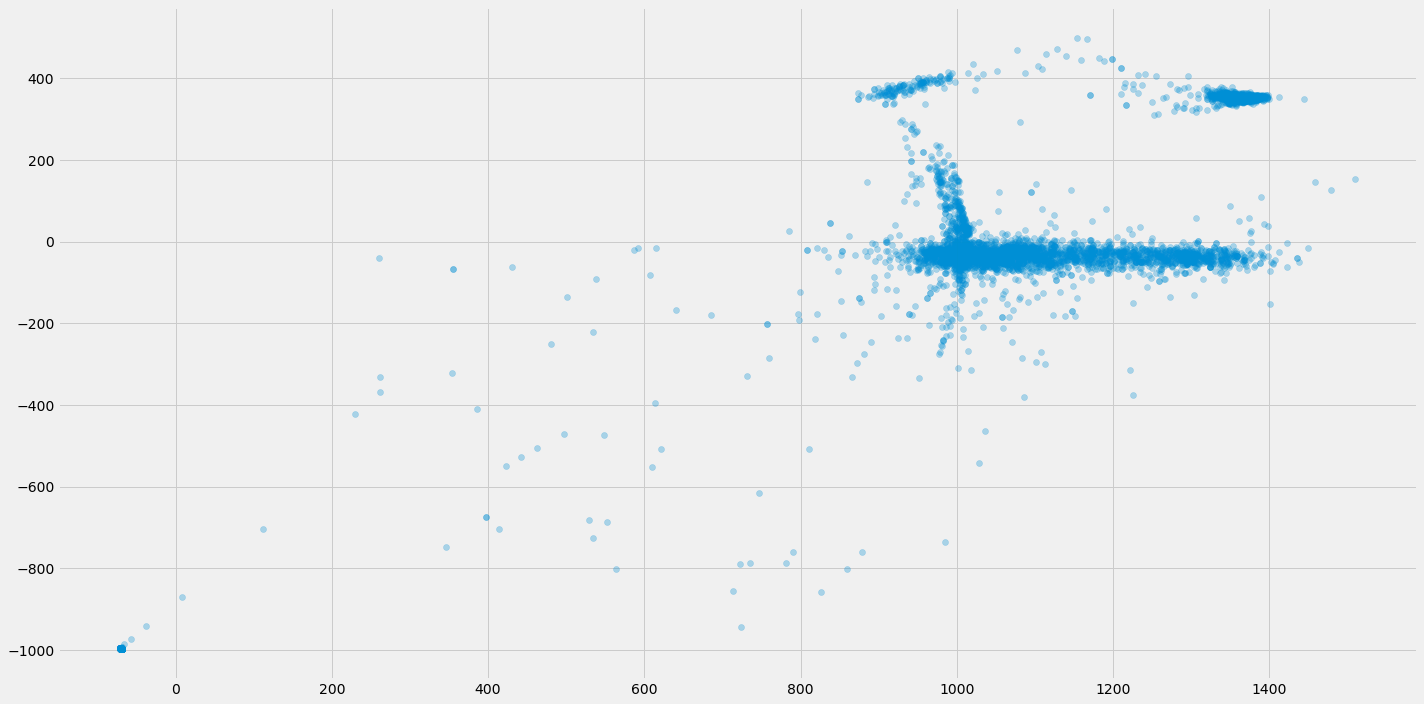

In [338]:
plt.scatter(df['LSM AZ, mg'], df['LSM AY, mg'], alpha=0.3,cmap='viridis')

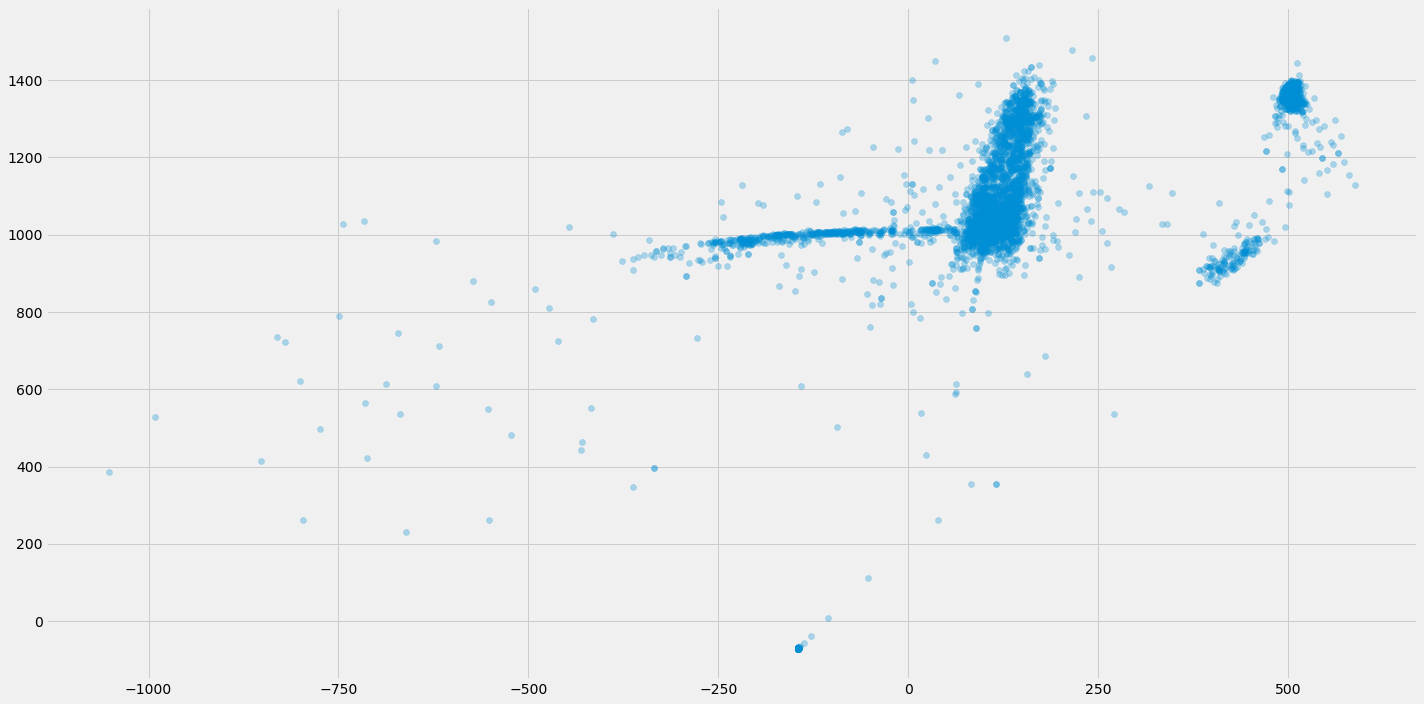

In [292]:
plt.scatter(df['LSM AX, mg'], df['LSM AZ, mg'], alpha=0.3,cmap='viridis')

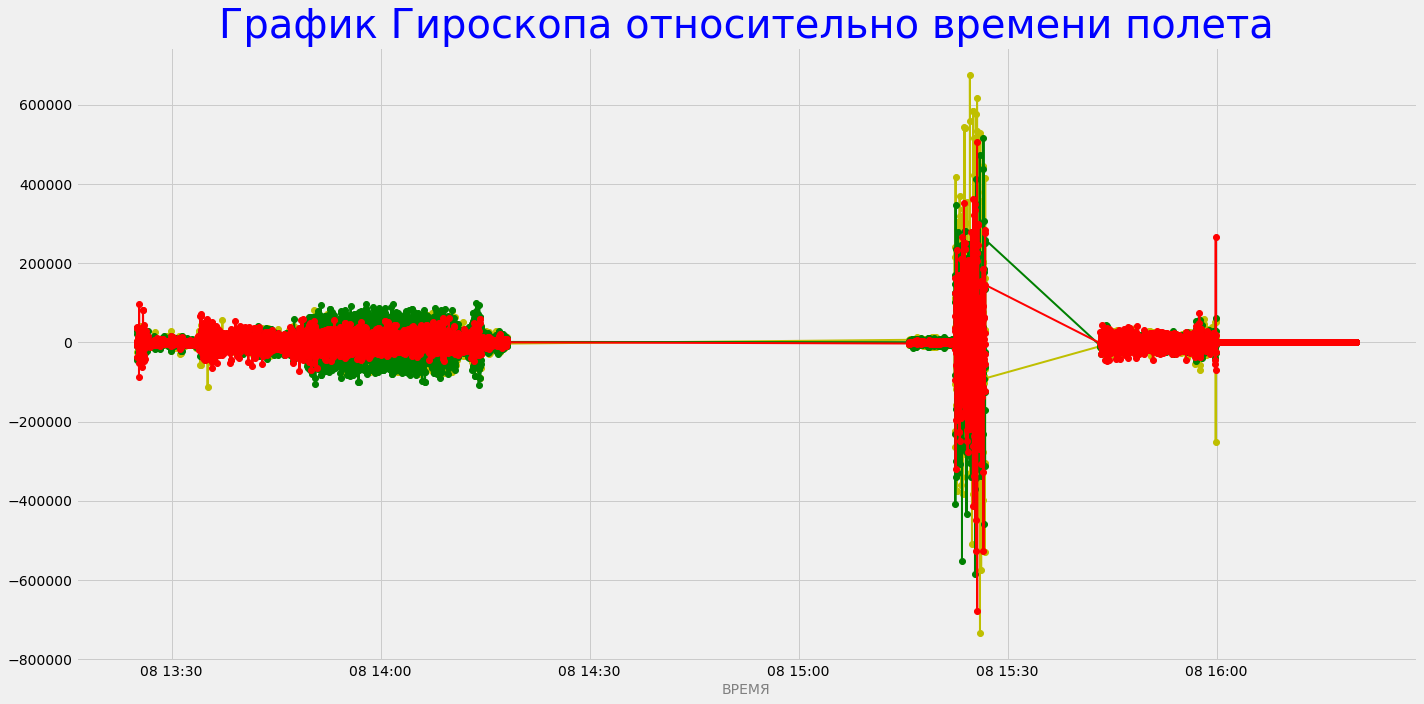

In [293]:
df=df_new.copy()
fig, ax = plt.subplots()
lw = 2.0
ax.set_xlabel("ВРЕМЯ",color="gray",fontsize=14)
ax.plot(df.index, df['LSM GX'], c='y', linewidth=lw,marker="o")
ax.plot(df.index, df['LSM GY'], c='g', linewidth=lw,marker="o")
ax.plot(df.index, df['LSM GZ'], c='r', linewidth=lw,marker="o")
plt.title(label="График Гироскопа относительно времени полета",fontsize=40,
          color="blue")
plt.show()

fig.savefig('Graph LSMR9UALL.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')

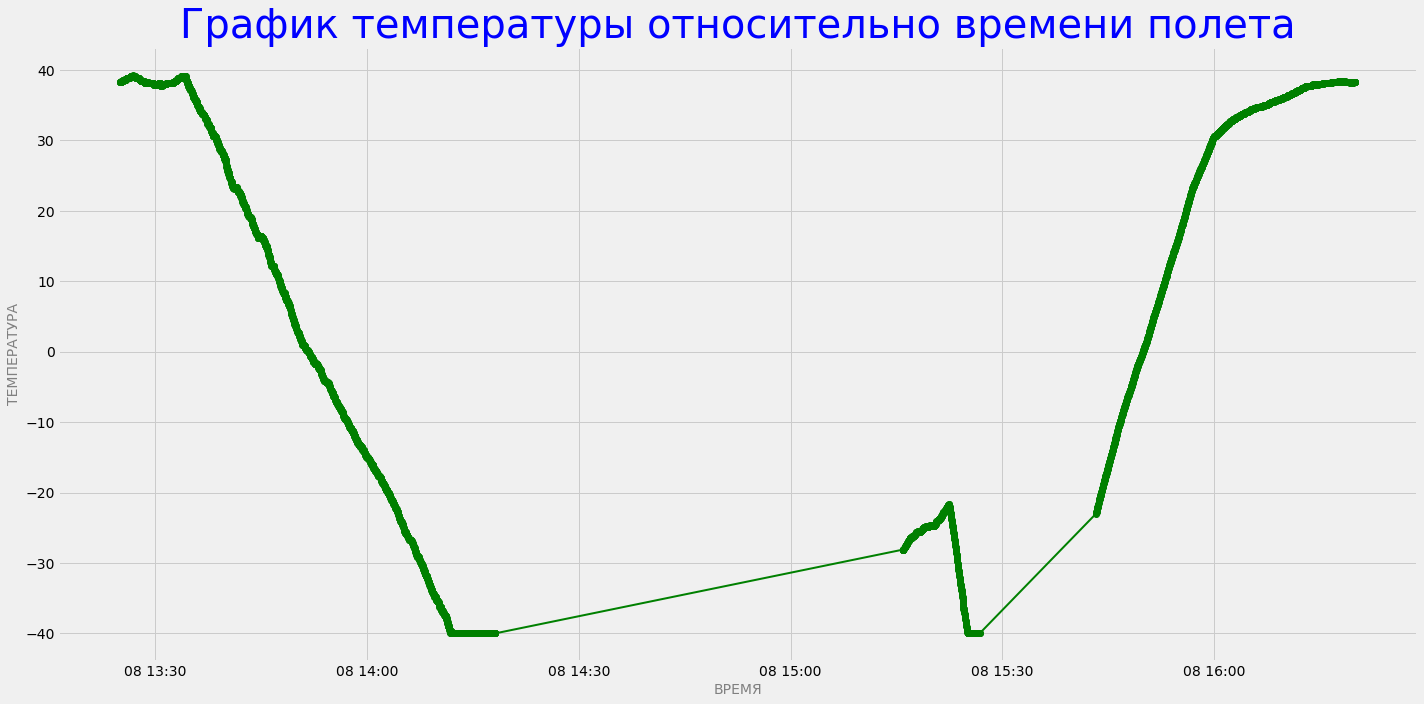

In [298]:
df=df_new.copy()
fig, ax = plt.subplots()
lw = 2.0
ax.set_ylabel("ТЕМПЕРАТУРА",color="gray",fontsize=14)
ax.set_xlabel("ВРЕМЯ",color="gray",fontsize=14)
ax.plot(df.index, df['HDC TEMP, `C'], c='g', linewidth=lw,marker="o")
#ax.plot(df.index, df['LPS TEMP, `C'], c='g', linewidth=lw,marker="o")
plt.title(label="График температуры относительно времени полета",fontsize=40,
          color="blue")
plt.show()

fig.savefig('Graph tempL.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')